In [1]:
import pandas as pd

# URL do dataset Wine
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Nome das colunas em português BR
column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

# Ler o arquivo CSV com as colunas especificadas, definindo a coluna 'classe' como object
vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})

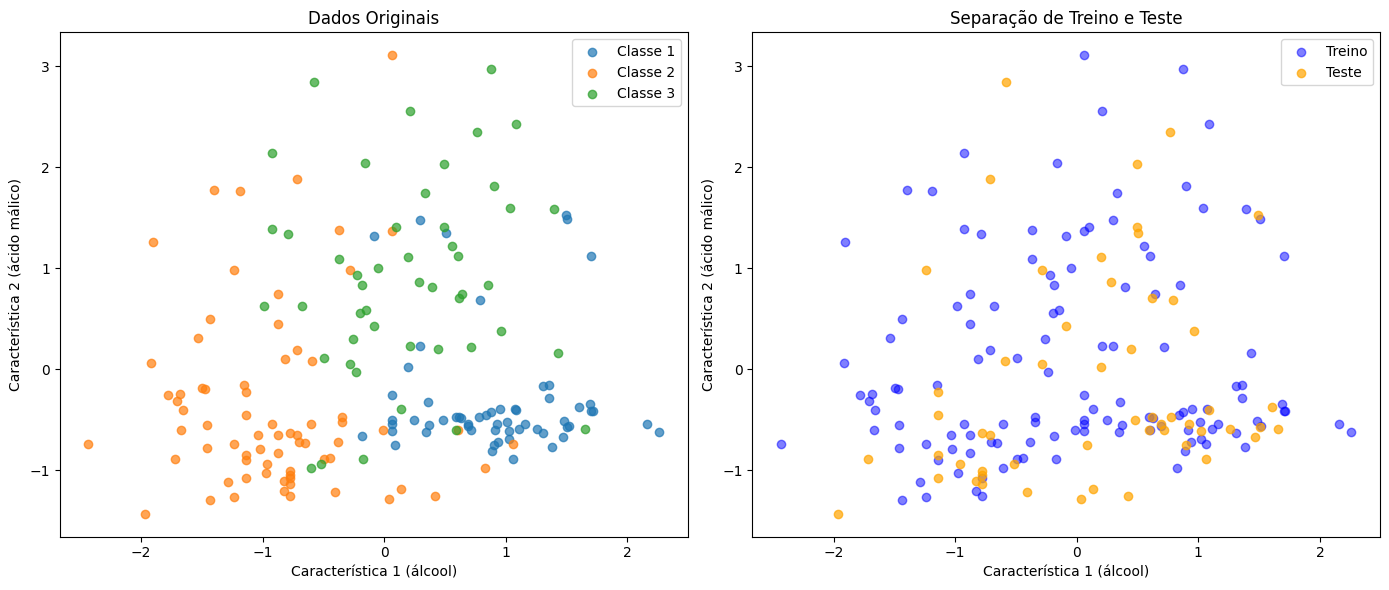

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#1 URL do dataset Wine
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

# carregamento do dataset
vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})

# Separação das variáveis preditoras e da variável alvo
X = vinhos.drop(columns=['classe'])
y = vinhos['classe']

# Escalar os dados (normalização)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Visualizar a separação dos dados usando as duas primeiras características
plt.figure(figsize=(14, 6))

# Gráfico para o conjunto original
plt.subplot(1, 2, 1)
for classe in y.unique():
    mask = y == classe
    plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], label=f'Classe {classe}', alpha=0.7)
plt.title("Dados Originais")
plt.xlabel("Característica 1 (álcool)")
plt.ylabel("Característica 2 (ácido málico)")
plt.legend()

# Representação gráfica para os conjuntos de treino e teste
plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', label='Treino', alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c='orange', label='Teste', alpha=0.7)
plt.title("Separação de Treino e Teste")
plt.xlabel("Característica 1 (álcool)")
plt.ylabel("Característica 2 (ácido málico)")
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
#2 Função para treinar e avaliar o modelo
def treinar_avaliar_knn(X_train, X_test, y_train, y_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Treinamento e avaliação se k for = 3
acc_k3 = treinar_avaliar_knn(X_train, X_test, y_train, y_test, k=3)
print(f"Acurácia com k=3: {acc_k3:.2f}")

# Treinamento e avaliação se k for = 5
acc_k5 = treinar_avaliar_knn(X_train, X_test, y_train, y_test, k=5)
print(f"Acurácia com k=5: {acc_k5:.2f}")


Acurácia com k=3: 0.96
Acurácia com k=5: 0.96


In [8]:
#3 Função para realizar o pipeline completo
def analisar_com_random_state(random_state, k_values):
    # Dividir os dados
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)

    # Avaliar para cada valor de k
    resultados = {}
    for k in k_values:
        acc = treinar_avaliar_knn(X_train, X_test, y_train, y_test, k)
        resultados[k] = acc
        print(f"Random State {random_state}, k={k}: Acurácia={acc:.2f}")
    return resultados

# Testar com diferentes random_state
random_states = [42, 17, 24]
k_values = [3, 5]

resultados_gerais = {}
for rs in random_states:
    print(f"\nAnalisando para random_state={rs}")
    resultados_gerais[rs] = analisar_com_random_state(rs, k_values)



Analisando para random_state=42
Random State 42, k=3: Acurácia=0.96
Random State 42, k=5: Acurácia=0.96

Analisando para random_state=17
Random State 17, k=3: Acurácia=0.98
Random State 17, k=5: Acurácia=0.98

Analisando para random_state=24
Random State 24, k=3: Acurácia=0.94
Random State 24, k=5: Acurácia=0.94


In [9]:
#4 Criar DataFrame para armazenar resultados
import pandas as pd

resultados_df = pd.DataFrame(resultados_gerais).T
resultados_df.columns = [f"k={k}" for k in k_values]
resultados_df.index.name = "random_state"

print("\nResultados finais:")
print(resultados_df)

# Identificar a melhor configuração
melhor_config = resultados_df.stack().idxmax()
melhor_valor = resultados_df.stack().max()
print(f"\nMelhor configuração: {melhor_config} com acurácia de {melhor_valor:.2f}")



Resultados finais:
                   k=3       k=5
random_state                    
42            0.962963  0.962963
17            0.981481  0.981481
24            0.944444  0.944444

Melhor configuração: (17, 'k=3') com acurácia de 0.98


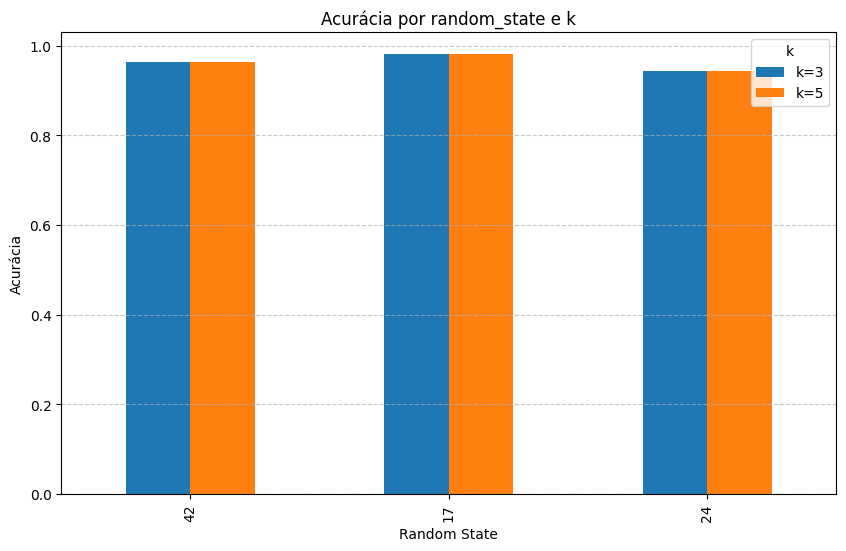

In [10]:
import matplotlib.pyplot as plt

# Gráfico de barras para comparação
resultados_df.plot(kind='bar', figsize=(10, 6))
plt.title("Acurácia por random_state e k")
plt.xlabel("Random State")
plt.ylabel("Acurácia")
plt.legend(title="k")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
